In [4]:
import numpy as np
import cv2
import pandas as pd
import os
import logging
import matplotlib.pyplot as plt
import tifffile

In [6]:
def setup_logging():

    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s'
    )

In [7]:
def load_points(csv_path):
    points = pd.read_csv(csv_path)[['x', 'y']].values
    return points.reshape(-1, 1, 2)

def transform_points(points, matrix):
    return cv2.perspectiveTransform(points, matrix)

In [8]:

def calculate_point_distances(mapped_points, target_points):
    return np.sqrt(np.sum((mapped_points - target_points) ** 2, axis=2)).flatten()

def calculate_point_distances_simple(mapped_points, target_points):
    return (mapped_points - target_points).reshape(-1, 2)

In [9]:
def plot_points_on_image(ax, image, points, color, size=8):
    ax.imshow(image, cmap='gray')
    points_2d = points.reshape(-1, 2)
    for i, (x, y) in enumerate(points_2d):
        ax.plot(x, y, f'{color[0]}o', markersize=size)
        ax.text(x+5, y+5, str(i), color=color, fontsize=8)

In [19]:

def visualize_registration(source_img, target_img, source_points, target_points, 
                         mapped_points, distances, figsize=(15, 25)):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=figsize)
    
    plot_points_on_image(ax1, source_img, source_points, 'red', 2)
    plot_points_on_image(ax2, target_img, target_points, 'blue', 2)
    plot_points_on_image(ax3, target_img, mapped_points, 'green', 2)
    
    ax1.set_title('Source Image with Original Points')
    ax2.set_title('Target Image with Target Points')
    ax3.set_title('Transformed Source Points')
    
    for i, dist in enumerate(distances):
        logging.info(f'Point {i}: distance = {dist:.2f}')
    
    plt.tight_layout()
    plt.show()

In [20]:
def main(directory):
    setup_logging()
    
    # Load data
    matrix = np.load(os.path.join(directory, 'dapi.tif__registration_matrix.npy'))
    source_points = load_points(os.path.join(directory, 'Xenium_landmarks_corrected.csv'))
    target_points = load_points(os.path.join(directory, 'HE_landmarks_corrected.csv'))
    
    # Load images
    source_img = tifffile.imread(os.path.join(directory, '..', 'dapi.tif'))
    target_img = tifffile.imread(os.path.join(directory, '..', 'he.tif'))
    
    # Process points
    mapped_points = transform_points(source_points, matrix)
    distances = calculate_point_distances(mapped_points, target_points)

    distances1 = calculate_point_distances_simple(mapped_points, target_points)
    print(distances1)

    # print("Source first points:", source_points.reshape(-1,2)[:3])
    # print("Target first points:", target_points.reshape(-1,2)[:3])
    # print("Mapped first points:", mapped_points.reshape(-1,2)[:3])

    # diffs = (mapped_points - target_points).reshape(-1, 2)
    # print("X differences:", diffs[:,0])
    # print("Y differences:", diffs[:,1])
    # print("\nMean absolute differences:")
    # print("X:", np.abs(diffs[:,0]).mean())
    # print("Y:", np.abs(diffs[:,1]).mean())

    # Output results
    mean_distance = np.mean(distances)
    logging.info(f'Mean distance: {mean_distance:.4f}')
    
    visualize_registration(source_img, target_img, source_points, target_points, 
                         mapped_points, distances)
    
    return mapped_points, distances, mean_distance

2025-01-29 23:34:06,708 - INFO - Mean distance: 71.3659


[[31.62037707 49.65215039]
 [36.73488076 59.12447268]
 [39.16796989 65.78632865]
 [37.24299458 60.13826472]
 [45.08344403 72.91105023]
 [47.85053694 71.03386631]
 [50.34179503 64.45980508]
 [55.25686663 59.57160056]
 [35.57744106 53.80237335]
 [23.95073047 44.68400003]
 [34.31640624 52.75497226]
 [37.52307301 50.71331035]
 [39.34491813 57.66867797]
 [40.63468506 51.92003208]
 [32.75720207 52.14842617]
 [31.56168292 59.65117087]
 [32.83993899 61.52462911]
 [44.67251883 70.26330047]
 [46.2881167  45.36556601]
 [42.21197011 33.3716861 ]
 [34.15041655 67.53571482]
 [28.74642988 65.94208603]
 [27.56572908 58.38759788]
 [31.24686104 67.9857666 ]
 [32.83180677 61.71878651]
 [32.85619124 68.99146121]
 [29.90919729 64.71871234]
 [31.98166043 63.86622846]
 [26.73190445 65.85914081]
 [34.11732881 67.17981739]
 [36.33332561 61.25650315]
 [42.28658884 61.1187678 ]
 [34.65945102 69.49192502]
 [36.10307475 58.43168894]
 [30.28857378 59.28601485]
 [31.34219526 56.11059328]
 [31.77847534 63.01704435]
 

2025-01-29 23:34:06,912 - INFO - Point 0: distance = 58.87
2025-01-29 23:34:06,913 - INFO - Point 1: distance = 69.61
2025-01-29 23:34:06,914 - INFO - Point 2: distance = 76.56
2025-01-29 23:34:06,914 - INFO - Point 3: distance = 70.74
2025-01-29 23:34:06,915 - INFO - Point 4: distance = 85.72
2025-01-29 23:34:06,916 - INFO - Point 5: distance = 85.65
2025-01-29 23:34:06,916 - INFO - Point 6: distance = 81.79
2025-01-29 23:34:06,916 - INFO - Point 7: distance = 81.25
2025-01-29 23:34:06,917 - INFO - Point 8: distance = 64.50
2025-01-29 23:34:06,917 - INFO - Point 9: distance = 50.70
2025-01-29 23:34:06,917 - INFO - Point 10: distance = 62.93
2025-01-29 23:34:06,918 - INFO - Point 11: distance = 63.09
2025-01-29 23:34:06,918 - INFO - Point 12: distance = 69.81
2025-01-29 23:34:06,919 - INFO - Point 13: distance = 65.93
2025-01-29 23:34:06,919 - INFO - Point 14: distance = 61.58
2025-01-29 23:34:06,919 - INFO - Point 15: distance = 67.49
2025-01-29 23:34:06,919 - INFO - Point 16: distanc

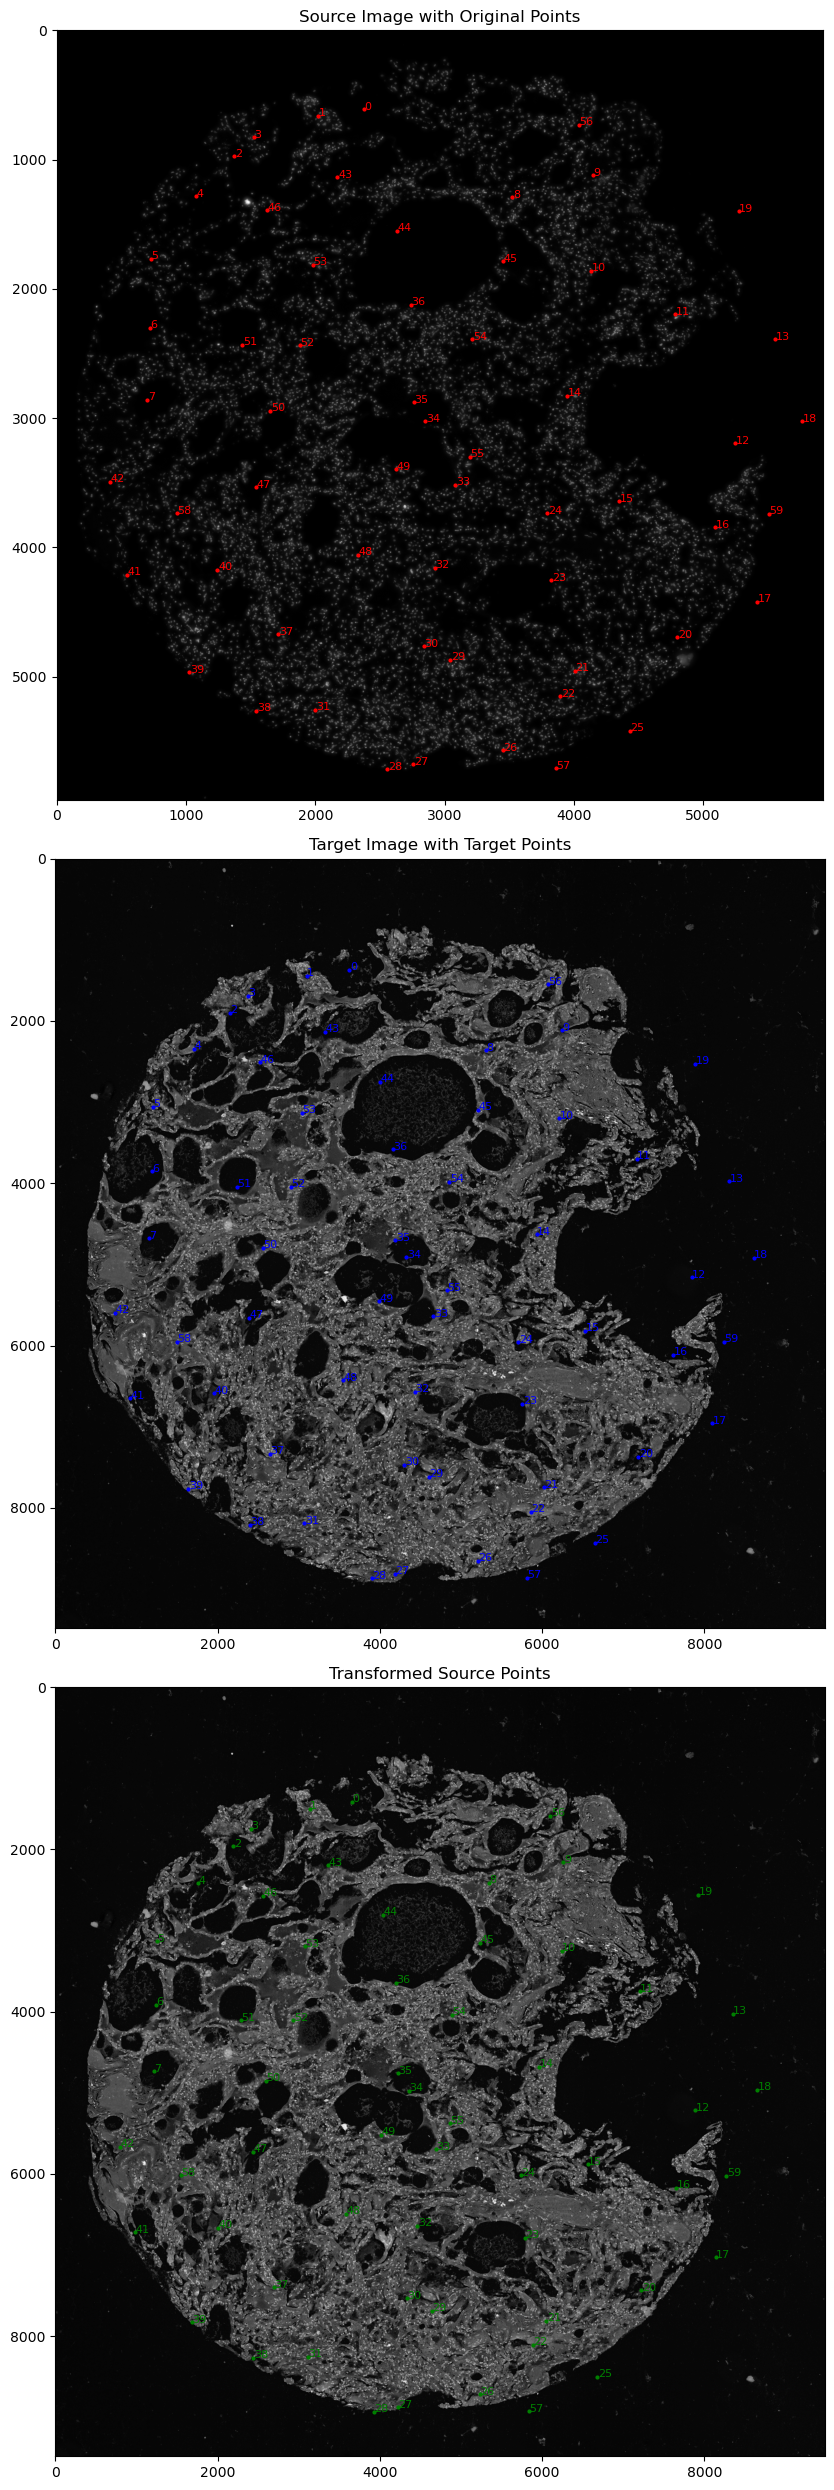

In [21]:
if __name__ == "__main__":
    directory = "/home/ella/Desktop/test_registration/lungtma_3/dapi_he"
    mapped_points, distances, mean_distance = main(directory)